In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

In [2]:
iris = load_iris()
X = iris.data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [3]:
sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

C:\Users\LAB 102 PC 14\AppData\Local\Temp\ipykernel_13084\2041772254.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K_range, sse, 'bo-', marker='o')


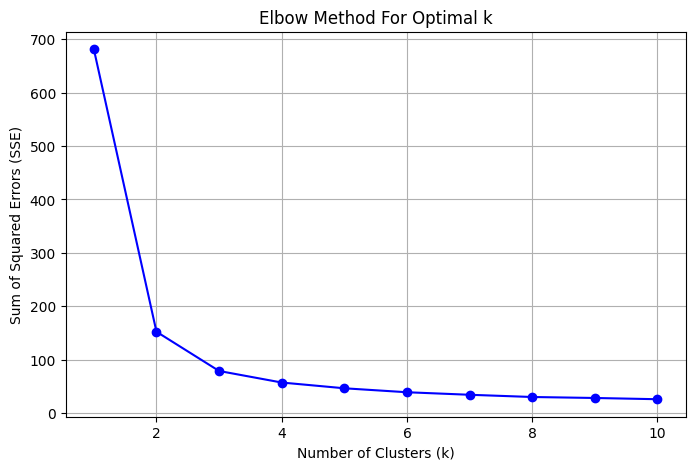

In [4]:
# Plot SSE vs K
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, 'bo-', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [5]:
# Grid Search-like loop to find best clustering
best_score = -1
best_model = None

for k in range(2, 11):
    for n_init in [10, 20]:
        for max_iter in [300, 500]:
            model = KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, random_state=42)
            labels = model.fit_predict(X)
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_model = model
                best_k = k
                best_labels = labels

In [6]:
# Final Model Results
print(f"\nBest KMeans Model:")
print(f"  - Optimal k: {best_k}")
print(f"  - Silhouette Score: {best_score:.4f}")
print(f"  - Cluster centers:\n{best_model.cluster_centers_}")



Best KMeans Model:
  - Optimal k: 2
  - Silhouette Score: 0.6810
  - Cluster centers:
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]


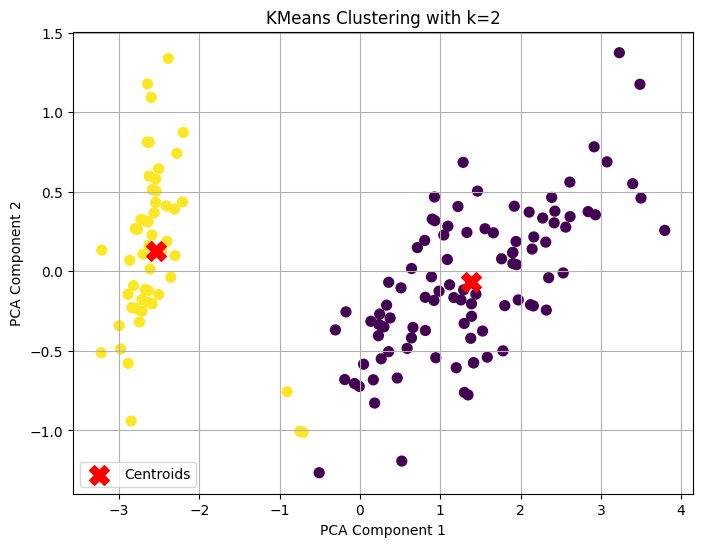

In [7]:

from sklearn.decomposition import PCA

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis', s=50)
centers_pca = pca.transform(best_model.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f"KMeans Clustering with k={best_k}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Initialize random centroids from the data
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]


In [9]:
# Calculate Euclidean distance between two points
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Assign each point to the nearest centroid
def assign_to_centroids(X, centroids):
    labels = np.zeros(len(X))
    for i, x in enumerate(X):
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        labels[i] = np.argmin(distances)
    return labels

In [10]:
# Update the centroids by calculating the mean of the points in each cluster
def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i] = X[labels == i].mean(axis=0)
    return new_centroids

In [11]:
# KMeans clustering
def kmeans(X, k, max_iters=100, tol=1e-4):
    # Initialize centroids
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = assign_to_centroids(X, centroids)
        #Update centroids
        new_centroids = update_centroids(X, labels, k)
        #Check for convergence 
        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Converged after {i+1} iterations")
            break
        centroids = new_centroids
    return centroids, labels
k = 3
centroids, labels = kmeans(X, k)

Converged after 10 iterations


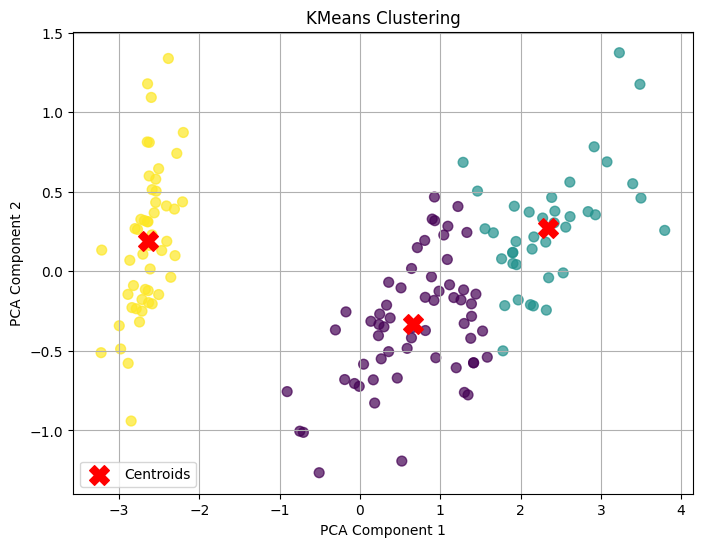

Final centroids:
 [[5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]]


In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

# Plotting the clusters and centroids
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

# Print final centroids
print("Final centroids:\n", centroids)


K-Mediods

In [13]:
# Initialize random medoids from the data
def initialize_medoids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]


In [14]:
# Calculate pairwise distances
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Assign each point to the nearest medoid
def assign_to_medoids(X, medoids):
    labels = np.zeros(len(X))
    for i, x in enumerate(X):
        distances = [euclidean_distance(x, medoid) for medoid in medoids]
        labels[i] = np.argmin(distances)
    return labels

In [15]:
# Update medoids by choosing the point in the cluster minimizing total distance
def update_medoids(X, labels, k):
    new_medoids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:
            # handle empty cluster
            new_medoids.append(X[np.random.choice(X.shape[0])])
            continue
        # Calculate total distance from each point to all others in the cluster
        distances = np.sum([[euclidean_distance(p1, p2) for p2 in cluster_points] for p1 in cluster_points], axis=1)
        medoid = cluster_points[np.argmin(distances)]
        new_medoids.append(medoid)
    return np.array(new_medoids)

In [16]:
# KMedoids clustering
def kmedoids(X, k, max_iters=100):
    medoids = initialize_medoids(X, k)
    for i in range(max_iters):
        labels = assign_to_medoids(X, medoids)
        new_medoids = update_medoids(X, labels, k)
        if np.allclose(medoids, new_medoids):
            print(f"Converged after {i+1} iterations")
            break
        medoids = new_medoids
    return medoids, labels

k = 3
medoids, labels = kmedoids(X, k)

Converged after 2 iterations


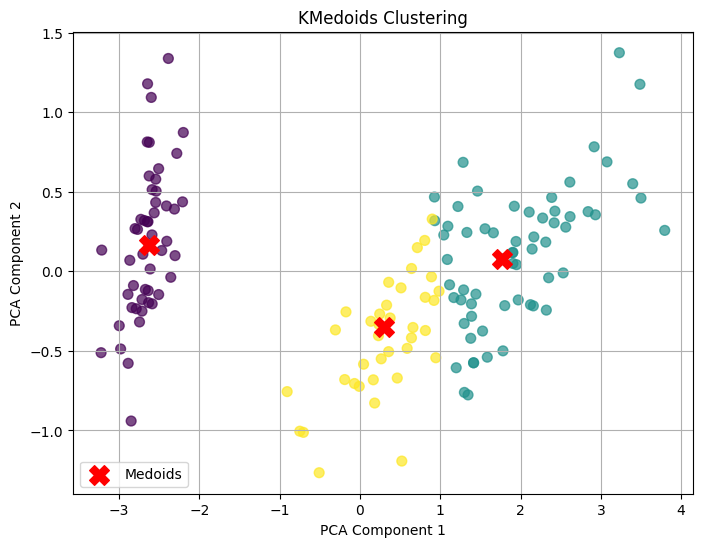

Final medoids:
 [[5.  3.4 1.5 0.2]
 [6.5 3.  5.2 2. ]
 [5.7 2.8 4.1 1.3]]
Silhouette Score: 0.5202


In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
medoids_pca = pca.transform(medoids)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(medoids_pca[:, 0], medoids_pca[:, 1], c='red', marker='X', s=200, label='Medoids')

plt.title("KMedoids Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()
print("Final medoids:\n", medoids)
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.4f}")